In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./seoul_4.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114142 entries, 0 to 114141
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gu_l          114142 non-null  int64  
 1   dong_l        114142 non-null  int64  
 2   used_y        114142 non-null  int64  
 3   square        114142 non-null  float64
 4   per_cost_man  114142 non-null  float64
 5   floor         114142 non-null  int64  
 6   YN_r          114142 non-null  int64  
 7   YN_top10      114142 non-null  int64  
 8   cost          114142 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 7.8 MB


In [20]:
df.columns

Index(['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'floor', 'YN_r',
       'YN_top10', 'cost'],
      dtype='object')

In [5]:
X = df.drop('cost', axis = 1)
y = df['cost']

Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_Norm, y, test_size = 0.3, random_state = 0)

In [7]:
re = KNeighborsRegressor(n_neighbors = 24, weights = "distance") # 구가 24개

In [8]:
re.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24, weights='distance')

R-squre = 0.9636132169758931
mse = 136390085.09643912
RMSE = 11678.616574596459


/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


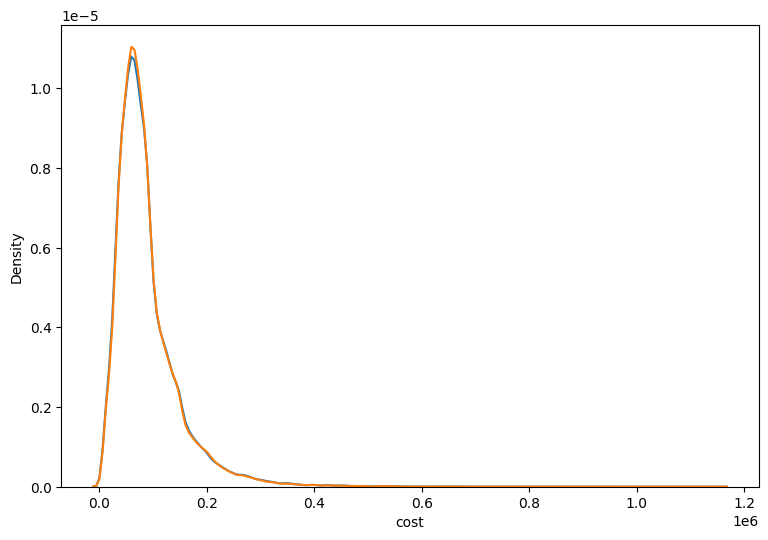

In [9]:
# 결정 계수
print(f'R-squre = {re.score(X_test, y_test)}')

pred = re.predict(X_test)

from math import sqrt
# MSE 확인
print(f'mse = {mean_squared_error(y_test, pred)}')
# RMSE
print(f'RMSE = {sqrt(mean_squared_error(y_test, pred))}')

y_X = re.predict(X_Norm)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()

In [10]:
# 결정계수는 높게 나오지만 오차가 1억.. 너무 크다
# y값을 정규화해서 해봄 =====================실패 y값 정규화하면 이상해짐

Norm_1 = MinMaxScaler()
df_Norm = Norm.fit_transform(df)

In [15]:
df_1 = pd.DataFrame(df_Norm)

In [16]:
df_1.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.02454,0.533333,0.216654,0.334067,0.100000,1.0,1.0,0.125437
1,0.0,0.02454,0.550000,0.142213,0.464748,0.100000,1.0,1.0,0.120629
2,0.0,0.02454,0.550000,0.223911,0.355145,0.100000,1.0,1.0,0.137019
3,0.0,0.02454,0.550000,0.223911,0.348691,0.114286,1.0,1.0,0.134615
4,0.0,0.02454,0.550000,0.223911,0.325222,0.071429,1.0,1.0,0.125874


In [17]:
df_1.describe()

,0,1,2,3,4,5,6,7,8
count,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000,114142.000000
mean,0.454034,0.464814,0.325694,0.209294,0.192472,0.171861,0.374656,0.294826,0.072307
std,0.281896,0.278980,0.164603,0.100030,0.107717,0.087510,0.484036,0.455966,0.053921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.248466,0.216667,0.156663,0.118693,0.100000,0.000000,0.000000,0.038462
50%,0.416667,0.441718,0.316667,0.212600,0.166944,0.157143,0.000000,0.000000,0.059441
75%,0.708333,0.720859,0.433333,0.240225,0.237518,0.228571,1.000000,1.000000,0.090035
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_1.columns = ['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'floor', 'YN_r',
       'YN_top10', 'cost']

In [22]:
df_1.head()

,gu_l,dong_l,used_y,square,per_cost_man,floor,YN_r,YN_top10,cost
0,0.0,0.02454,0.533333,0.216654,0.334067,0.100000,1.0,1.0,0.125437
1,0.0,0.02454,0.550000,0.142213,0.464748,0.100000,1.0,1.0,0.120629
2,0.0,0.02454,0.550000,0.223911,0.355145,0.100000,1.0,1.0,0.137019
3,0.0,0.02454,0.550000,0.223911,0.348691,0.114286,1.0,1.0,0.134615
4,0.0,0.02454,0.550000,0.223911,0.325222,0.071429,1.0,1.0,0.125874


In [23]:
X_1 = df_1.drop('cost', axis = 1)
y_1 = df_1['cost']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.3, random_state = 0)

re_Norm = KNeighborsRegressor(n_neighbors = 24, weights = "distance")
re_Norm.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=24, weights='distance')

R-squre = 0.9636132169758931
mse = 0.00010421512443796086
RMSE = 0.010208580921850053


/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


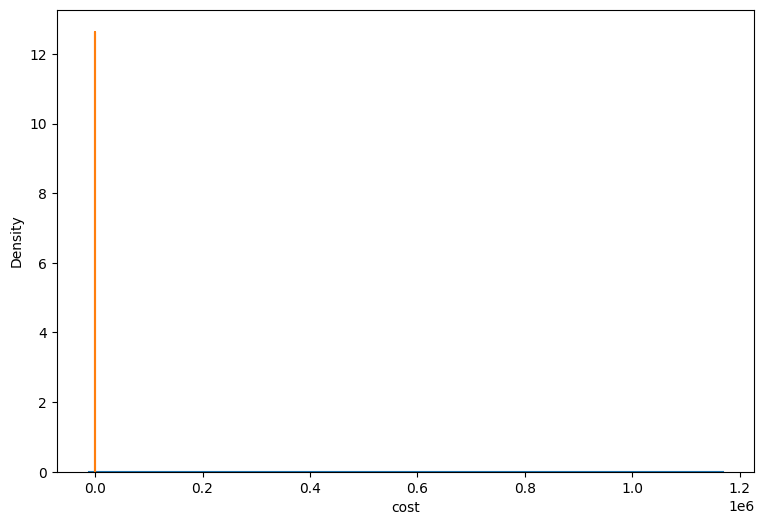

In [26]:
# 결정 계수
print(f'R-squre = {re_Norm.score(X_test, y_test)}')

pred = re.predict(X_test)

from math import sqrt
# MSE 확인
print(f'mse = {mean_squared_error(y_test, pred)}')
# RMSE
print(f'RMSE = {sqrt(mean_squared_error(y_test, pred))}')

y_X = re.predict(X_1)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()